In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import numpy as np
import pandas as pd

In [22]:
filepath = '..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//arrays500by500//arraymin.npy'

In [23]:
array = np.load(filepath)

#give nan values the value of the min - hog does not work with Nan
array[np.isnan(array)] = np.nanmin(array)

/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


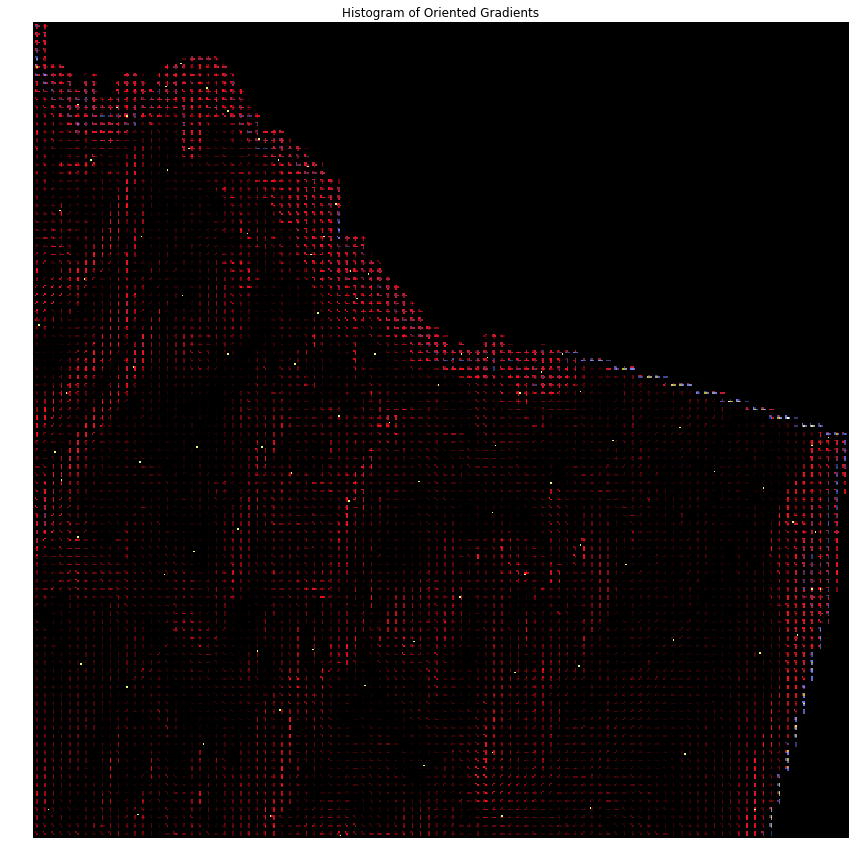

In [24]:
image = array

fd, hog_image = hog(image, orientations=4, pixels_per_cell=(5,5), cells_per_block=(1,1), visualise=True, feature_vector= False)

fig, (ax2) = plt.subplots(figsize=(15, 15))

arraySS = np.load('..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//arrays500by500//arraySS.npy')
# xi = np.arange(0, 100)
# yi = np.arange(0, 100)
# X, Y = np.meshgrid(xi, yi)
# Z = arraySS[X,Y]

# ax1.axis('on')
# ax1.imshow(image, cmap=plt.cm.hot)
# ax1.set_title('Input image')
# ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 20))

import numpy.ma as ma
Zm = ma.masked_equal(arraySS, 0)

ax2.axis('off')
im1 = ax2.imshow(hog_image_rescaled, cmap=plt.cm.gist_stern)
im2 = ax2.imshow(Zm,cmap=plt.cm.Wistia)
ax2.set_title('Histogram of Oriented Gradients')
# ax1.set_adjustable('box-forced')
plt.show()

In [20]:
fd.shape

(100, 100, 1, 1, 4)

In [25]:
HOG_output = pd.DataFrame()
HOG_output

""


#HOG stored as 4D array - to access vector in the 4 directions need to index fd[0][0][0][1]
for i in range(0,19):
    for j in range(0,19):
        for a in range(0,2):
            for b in range(0,2):
                print (fd[i][j][a][b])

In [26]:

for r in range(0,100):
    for c in range(0,100):
        for a in range(0,1):
            for b in range(0,1):
                row = [r,c,(fd[r][c][a][b][0]),(fd[r][c][a][b][1]),(fd[r][c][a][b][2]),(fd[r][c][a][b][3])]
                HOG_output = HOG_output.append([row])
                print (fd[r][c][a][b])

[ 0.13780736  0.08366171  0.48731849  0.29120083]
[ 0.59800198  0.          0.32198354  0.07996769]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]


[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.4975021   0.41249659  0.08997133  0.        ]
[ 0.18186249  0.12206238  0.67946023  0.01659829]
[ 0.12164666  0.70825942  0.02754774  0.14252322]
[ 0.25825764  0.4017036   0.18245594  0.15751453]
[ 0.71707269  0.          0.06274795  0.22013737]
[ 0.07176432  0.46380983  0.18348822  0.28089052]
[ 0.05405651  0.14499559  0.30384768  0.4970822 ]
[ 0.06379527  0.          0.78200625  0.1541719 ]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  

[ 0.38379689  0.          0.27821812  0.33792309]
[ 0.27897647  0.27826749  0.44272091  0.        ]
[ 0.45025755  0.50009384  0.          0.0496344 ]
[ 0.28917654  0.63647115  0.07431924  0.        ]
[ 0.2330907   0.65322004  0.11366251  0.        ]
[ 0.02632465  0.11848695  0.13657651  0.71859556]
[ 0.          0.66636095  0.33362483  0.        ]
[ 0.1346768   0.4951442   0.31703563  0.05312132]
[ 0.44114157  0.35018179  0.20866041  0.        ]
[ 0.34656514  0.2732474   0.27439567  0.10575387]
[ 0.36534828  0.03167437  0.08259053  0.52035576]
[ 0.60583686  0.26845131  0.05422478  0.07145765]
[ 0.04465896  0.45406598  0.32999426  0.17125289]
[ 0.02768614  0.09801566  0.35196527  0.52230524]
[ 0.3489196   0.38386881  0.14382498  0.12336489]
[ 0.          0.15133451  0.51458055  0.33406085]
[ 0.          0.09726717  0.44179454  0.46092298]
[ 0.09573299  0.          0.18256433  0.72168428]
[ 0.99937539  0.          0.          0.        ]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  

[ 0.01950593  0.          0.46556278  0.51490424]
[ 0.0628398   0.25200368  0.53881631  0.14630617]
[ 0.17297278  0.66510936  0.16189901  0.        ]
[ 0.10901287  0.769828    0.12113159  0.        ]
[ 0.08160847  0.51326042  0.40501159  0.        ]
[ 0.08525994  0.33754563  0.17722892  0.39982341]
[ 0.83305337  0.          0.          0.16681547]
[ 0.17266842  0.03488429  0.          0.79232395]
[ 0.16935324  0.          0.04233831  0.78809676]
[ 0.15137555  0.05351934  0.27384093  0.52107496]
[ 0.36350703  0.          0.          0.6364721 ]
[ 0.56811233  0.13329854  0.          0.29854691]
[ 0.59752629  0.          0.          0.4024369 ]
[ 0.23382838  0.06613666  0.10457124  0.59522989]
[ 0.12482584  0.          0.22768801  0.64727811]
[ 0.          0.          0.49482673  0.50497489]
[ 0.46410278  0.25563385  0.08865625  0.19145936]
[ 0.30568444  0.          0.          0.69426462]
[ 0.          0.          0.53233682  0.46765052]
[ 0.28382375  0.10091353  0.          0.6152502 ]


[ 0.70231958  0.11525017  0.          0.18222651]
[ 0.1271751   0.          0.33294871  0.53955826]
[ 0.07359683  0.          0.39284613  0.5335052 ]
[ 0.29621465  0.40338361  0.20710804  0.09326347]
[ 0.14622195  0.0295413   0.21381968  0.61031263]
[ 0.04949256  0.          0.32032256  0.62993741]
[ 0.          0.          0.78330665  0.21654024]
[ 0.0919189   0.099242    0.29848032  0.51026685]
[ 0.          0.          0.70672976  0.29292502]
[ 0.          0.10161979  0.89820057  0.        ]
[ 0.          0.99985551  0.          0.        ]
[ 0.0410494   0.31575611  0.15119652  0.49190618]
[ 0.08507233  0.18133316  0.48555128  0.24799717]
[ 0.          0.          0.6410657   0.35890092]
[ 0.01275409  0.          0.60468364  0.38254101]
[ 0.          0.38314915  0.54156387  0.07527129]
[ 0.1106423   0.01386106  0.06703496  0.80844535]
[ 0.03946189  0.          0.70083701  0.2596866 ]
[ 0.          0.          0.99950025  0.        ]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  

[ 0.45148976  0.24580836  0.1704181   0.13212807]
[ 0.41486783  0.04824028  0.06822206  0.46849928]
[ 0.43902891  0.          0.18700294  0.37383458]
[ 0.21378341  0.52377969  0.19628735  0.06604514]
[ 0.04023635  0.28291074  0.67678585  0.        ]
[ 0.10217207  0.16223474  0.54188146  0.19365788]
[ 0.09020235  0.30846978  0.60128277  0.        ]
[ 0.08168747  0.37206713  0.34624571  0.19994358]
[ 0.19231244  0.28254904  0.27028026  0.25477975]
[ 0.3104897   0.          0.23214196  0.45730344]
[ 0.068296    0.          0.09498563  0.8366892 ]
[ 0.31898205  0.          0.          0.68099906]
[ 0.19982229  0.07215664  0.12918399  0.59881112]
[ 0.11783135  0.16418115  0.23413091  0.48383688]
[ 0.99987502  0.          0.          0.        ]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.

[ 0.67702136  0.          0.0615474   0.2611235 ]
[ 0.17750018  0.          0.15475787  0.667702  ]
[ 0.45442888  0.          0.09091946  0.45460084]
[ 0.2111395   0.          0.1075211   0.68131709]
[ 0.51870437  0.          0.04128642  0.43996305]
[ 0.40537534  0.          0.02086137  0.57373031]
[ 0.1870303   0.          0.          0.81294686]
[ 0.15207165  0.1397874   0.21767098  0.49042911]
[ 0.11990079  0.04966597  0.02939036  0.80102796]
[ 0.16955762  0.12232379  0.2812096   0.42689415]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  

[ 0.85832414  0.14155074  0.          0.        ]
[ 0.22053463  0.14587123  0.10314653  0.5302757 ]
[ 0.09375629  0.19888714  0.40341231  0.30370987]
[ 0.05219525  0.          0.57846758  0.36907619]
[ 0.05906363  0.          0.          0.94090684]
[ 0.49362494  0.          0.04188454  0.4644574 ]
[ 0.31264984  0.28289672  0.16514241  0.2392619 ]
[ 0.58842065  0.10356329  0.05210031  0.25587507]
[ 0.36887256  0.06441376  0.21082007  0.35586107]
[ 0.4553001   0.          0.          0.54469277]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  

[ 0.27402688  0.21458135  0.24879198  0.26255887]
[ 0.09048954  0.65091433  0.2585412   0.        ]
[ 0.34332789  0.          0.          0.65663136]
[ 0.40510351  0.          0.          0.59486784]
[ 0.26866115  0.12536217  0.          0.60594278]
[ 0.23232434  0.          0.1008148   0.66683354]
[ 0.04505459  0.          0.0633496   0.89157849]
[ 0.9996876  0.         0.         0.       ]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  

[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  

[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.42923166  0.57071866  0.          0.      

[ 0.10710406  0.19159357  0.60845139  0.09278538]
[ 0.05539878  0.11751857  0.          0.82694415]
[ 0.31704253  0.          0.          0.68287404]
[ 0.2722266   0.07110665  0.25955928  0.39685607]
[ 0.47379894  0.          0.          0.52614437]
[ 0.          0.          0.4365597   0.56341888]
[ 0.29483242  0.27653106  0.33483649  0.09376904]
[ 0.          0.          0.35124792  0.64873955]
[ 0.20031255  0.          0.34358174  0.45609273]
[ 0.15434097  0.10594237  0.3565623   0.38313208]
[ 0.         0.         0.9998946  0.       ]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.

[ 0.79355603  0.06312357  0.          0.14324601]
[ 0.30408413  0.          0.08255794  0.61317333]
[ 0.06244321  0.          0.06981363  0.86758706]
[ 0.33141403  0.18526607  0.24856051  0.23434512]
[ 0.34806124  0.16407765  0.24145458  0.24611647]
[ 0.26638011  0.14720382  0.52918387  0.05703058]
[ 0.50092302  0.          0.00764343  0.49139534]
[ 0.22058024  0.15597379  0.22058024  0.40259   ]
[ 0.28300571  0.          0.          0.71664053]
[ 0.16570702  0.          0.41426752  0.4196112 ]
[ 0.          0.          0.56853427  0.43132709]
[ 0.          0.          0.45324825  0.54665289]
[ 0.          0.49480673  0.44391903  0.06113753]
[ 0.12460818  0.03967294  0.08828216  0.7474041 ]
[ 0.05398228  0.3408003   0.43700652  0.16817635]
[ 0.          0.          0.1438629   0.85611746]
[ 0.08603027  0.18430767  0.36395638  0.36569624]
[ 0.14675573  0.12127481  0.15177426  0.58017967]
[ 0.05471914  0.57933243  0.2823856   0.08354754]
[ 0.0804671   0.32718693  0.15182055  0.4405109 ]


[ 0.70039598  0.13010336  0.08908719  0.08030211]
[ 0.50576099  0.04405341  0.13930909  0.31072076]
[ 0.82283677  0.          0.07323174  0.10356533]
[ 0.2351448   0.07259003  0.02566445  0.6664724 ]
[ 0.16537951  0.16772618  0.51065666  0.15610505]
[ 0.27194149  0.26359283  0.13933256  0.32503585]
[ 0.07741711  0.48598046  0.4026503   0.03383252]
[ 0.69308832  0.          0.06955061  0.23724516]
[ 0.79782431  0.05448536  0.03852697  0.10897072]
[ 0.55307734  0.0949688   0.20145924  0.15015885]
[ 0.51954418  0.07347465  0.25977209  0.1469493 ]
[ 0.57897827  0.06565026  0.18568696  0.1694524 ]
[ 0.47443194  0.17288481  0.04074934  0.31183204]
[ 0.06358755  0.08992637  0.25435018  0.59181796]
[ 0.24712522  0.          0.0690736   0.68364673]
[ 0.12128356  0.          0.36385066  0.51456257]
[ 0.21468503  0.61902172  0.09726989  0.0687802 ]
[ 0.25610401  0.          0.18081232  0.56287025]
[ 0.08842019  0.          0.08842019  0.82293857]
[ 0.07791008  0.          0.33003236  0.59186279]


[ 0.38226017  0.19933674  0.10921719  0.30891286]
[ 0.22942676  0.43261128  0.22942676  0.10815282]
[ 0.26957035  0.19061503  0.5391407   0.        ]
[ 0.60388111  0.          0.07548514  0.32025632]
[ 0.32024899  0.6793507   0.          0.        ]
[ 0.51584436  0.39627238  0.08773703  0.        ]
[ 0.10924086  0.11586743  0.23137587  0.54337929]
[ 0.38514524  0.          0.          0.61472857]
[ 0.32040414  0.22655995  0.10680138  0.34596753]
[ 0.04253236  0.14521456  0.53692065  0.27523732]
[ 0.19304601  0.54071257  0.26613053  0.        ]
[ 0.53285458  0.05752875  0.20339483  0.20601844]
[ 0.25403359  0.05760966  0.36662558  0.32152749]
[ 0.27409555  0.35935245  0.30644817  0.05989208]
[ 0.4512868   0.54849773  0.          0.        ]
[ 0.44074283  0.51363117  0.04539901  0.        ]
[ 0.32947502  0.25756975  0.18212931  0.23059826]
[ 0.60388111  0.          0.07548514  0.32025632]
[ 0.31972075  0.03737108  0.35339618  0.28937986]
[ 0.14832715  0.37560106  0.37081784  0.10488314]


[ 0.52530796  0.26780474  0.20668063  0.        ]
[ 0.2887051   0.57160702  0.05774102  0.08165814]
[ 0.55966294  0.          0.22645541  0.21350422]
[ 0.48226716  0.22734294  0.21434098  0.07578098]
[ 0.33961903  0.16009796  0.33961903  0.16009796]
[ 0.31071077  0.14647047  0.31071077  0.23159014]
[ 0.64614826  0.13054166  0.09230689  0.13054166]
[ 0.26672259  0.25146849  0.35563014  0.12573424]
[ 0.25724896  0.          0.25724896  0.48507333]
[ 0.66019065  0.25463195  0.          0.08487732]
[ 0.43275998  0.4430587   0.1239747   0.        ]
[ 0.89045946  0.07294106  0.          0.03647053]
[ 0.13138824  0.04767604  0.38273667  0.43809244]
[ 0.44771287  0.          0.22195237  0.33021151]
[ 0.37403422  0.13905895  0.21445102  0.27233768]
[ 0.74274328  0.03222549  0.          0.22491729]
[ 0.29296478  0.24196787  0.46496144  0.        ]
[ 0.18209339  0.24414574  0.50375838  0.06990674]
[ 0.11304157  0.19083283  0.42949564  0.26644156]
[ 0.07567526  0.19144497  0.6848493   0.04786124]


[ 0.09977574  0.81808646  0.08200114  0.        ]
[ 0.12526299  0.24292647  0.59153724  0.04013141]
[ 0.46061186  0.13503264  0.12730999  0.27688638]
[ 0.99994544  0.          0.          0.        ]
[ 0.89414284  0.09473699  0.01108099  0.        ]
[ 0.0915769   0.67803457  0.23032311  0.        ]
[ 0.37087504  0.49683833  0.13215862  0.        ]
[ 0.29454997  0.0694261   0.38715398  0.24862449]
[ 0.12128356  0.          0.36385066  0.51456257]
[ 0.25226755  0.42586927  0.16817837  0.15347459]
[ 0.17939787  0.54874782  0.21175047  0.05989208]
[ 0.10261524  0.36279969  0.4617686   0.07255994]
[ 0.20461259  0.38582122  0.40922517  0.        ]
[ 0.59616012  0.10538722  0.29808006  0.        ]
[ 0.48570987  0.2847807   0.13424691  0.0949269 ]
[ 0.21958951  0.          0.36598251  0.41406199]
[ 0.42572187  0.40137443  0.          0.17266719]
[ 0.          0.          0.99502488  0.        ]
[ 0.1805695   0.25536384  0.1805695   0.38304575]
[ 0.35493517  0.33463611  0.05915586  0.25097708]


[ 0.02220499  0.24173827  0.48462738  0.25142365]
[ 0.02727141  0.01138325  0.51141073  0.44992973]
[ 0.          0.          0.69756473  0.3024263 ]
[ 0.26615219  0.70516631  0.02860998  0.        ]
[ 0.18737366  0.65013523  0.16237513  0.        ]
[ 0.03564601  0.32254749  0.64162826  0.        ]
[ 0.05679841  0.08032508  0.49461217  0.36798035]
[ 0.69420306  0.16681386  0.          0.13886513]
[ 0.99996447  0.          0.          0.        ]
[ 0.46303155  0.52256668  0.01433012  0.        ]
[ 0.11796788  0.88193886  0.          0.        ]
[ 0.03002015  0.35968365  0.6101461   0.        ]
[ 0.20298611  0.04784429  0.25301231  0.49598814]
[ 0.1448308   0.15636935  0.29649961  0.4021554 ]
[ 0.29099539  0.2075436   0.50131886  0.        ]
[ 0.40288847  0.42660614  0.03662623  0.13369603]
[ 0.05856149  0.41409229  0.52705342  0.        ]
[ 0.2045536   0.          0.1022768   0.69291391]
[ 0.64614826  0.26108332  0.09230689  0.        ]
[ 0.06607642  0.18689235  0.55980849  0.18689235]


[ 0.19486332  0.          0.33958127  0.46553016]
[ 0.79979826  0.          0.          0.20017851]
[ 0.49834901  0.          0.08918132  0.41246081]
[ 0.2623442   0.40828592  0.32926013  0.        ]
[ 0.          0.          0.7091806   0.29066325]
[ 0.4619899   0.          0.0396641   0.49820576]
[ 0.99991985  0.          0.          0.        ]
[ 0.99996882  0.          0.          0.        ]
[ 0.65842493  0.34148388  0.          0.        ]
[ 0.45304132  0.54686043  0.          0.        ]
[ 0.          0.34411904  0.48365157  0.17205952]
[ 0.41452506  0.08858023  0.          0.49673812]
[ 0.19803467  0.07001583  0.04950867  0.68219329]
[ 0.11716877  0.33140334  0.44076482  0.11046778]
[ 0.30500532  0.26958917  0.31737922  0.10783567]
[ 0.18010338  0.          0.65862715  0.16108936]
[ 0.          0.04460955  0.48321287  0.47201986]
[ 0.15869241  0.          0.31738482  0.52365829]
[ 0.15097027  0.21350421  0.52839598  0.10675211]
[ 0.08470019  0.05989208  0.40114584  0.45405015]


[ 0.7300116   0.09148503  0.04896034  0.12950105]
[ 0.25598985  0.04940174  0.13469954  0.55984037]
[ 0.16592306  0.05158304  0.05954336  0.72289287]
[ 0.95240958  0.          0.          0.04757712]
[ 0.43378805  0.12316997  0.05432788  0.38870042]
[ 0.05145175  0.          0.21795315  0.73046647]
[ 0.30081067  0.          0.          0.69909532]
[ 0.99994841  0.          0.          0.        ]
[ 0.99996693  0.          0.          0.        ]
[ 0.62986611  0.32245343  0.04759633  0.        ]
[ 0.81761835  0.18230108  0.          0.        ]
[ 0.45080905  0.4689674   0.08005774  0.        ]
[ 0.44366333  0.23701701  0.          0.31915206]
[ 0.31533235  0.          0.1970827   0.48738786]
[ 0.          0.31001689  0.6220714   0.06767245]
[ 0.04356189  0.31802632  0.57658817  0.06160581]
[ 0.21166348  0.          0.48873457  0.29933737]
[ 0.11442411  0.05394004  0.50780488  0.32364026]
[ 0.21565431  0.07624531  0.40284956  0.30498125]
[ 0.06728037  0.04757441  0.74225379  0.14272323]


[ 0.68088593  0.31904164  0.          0.        ]
[ 0.          0.          0.11198648  0.88792649]
[ 0.73445369  0.          0.          0.26550269]
[ 0.99997333  0.          0.          0.        ]
[ 0.29460442  0.62347467  0.          0.08182168]
[ 0.67493663  0.3249813   0.          0.        ]
[ 0.63895439  0.36091801  0.          0.        ]
[ 0.81701156  0.10209488  0.          0.08071308]
[ 0.24618959  0.08704117  0.49237918  0.17408233]
[ 0.          0.51996293  0.42688536  0.05296445]
[ 0.          0.44921496  0.48784372  0.06271957]
[ 0.04619794  0.06533375  0.61147911  0.2767582 ]
[ 0.28948657  0.06823264  0.30087632  0.34116323]
[ 0.22050033  0.07795864  0.23351357  0.46775184]
[ 0.24521621  0.          0.32099219  0.43348508]
[ 0.19630332  0.13880742  0.20788853  0.45675535]
[ 0.26430292  0.29902465  0.24345213  0.192956  ]
[ 0.1418653   0.          0.13578024  0.72217713]
[ 0.27769901  0.29985519  0.2532678   0.16894659]
[ 0.25531609  0.18053575  0.38297412  0.18053575]


[ 0.89300548  0.          0.          0.10696933]
[ 0.60257681  0.1506681   0.03668768  0.21000627]
[ 0.16141439  0.83850781  0.          0.        ]
[ 0.02140082  0.88402441  0.06420245  0.03026533]
[ 0.95516661  0.          0.          0.04467544]
[ 0.32252711  0.60095387  0.07613832  0.        ]
[ 0.          0.78122028  0.21859755  0.        ]
[ 0.          0.4624233   0.48072269  0.05665372]
[ 0.13101625  0.          0.52406501  0.34470037]
[ 0.15982794  0.05650771  0.20921747  0.57424709]
[ 0.05255714  0.          0.23504266  0.71213741]
[ 0.21100562  0.36047779  0.16349809  0.26481413]
[ 0.019312    0.21793006  0.70159147  0.06106991]
[ 0.33818442  0.          0.03757605  0.62405166]
[ 0.26150234  0.1056629   0.07471495  0.55793302]
[ 0.77068416  0.          0.0377817   0.19134523]
[ 0.06040553  0.39134981  0.12081105  0.42713159]
[ 0.11214894  0.07930128  0.72896812  0.07930128]
[ 0.27134497  0.1644599   0.03876357  0.52523774]
[ 0.84955329  0.15018123  0.          0.        ]


[ 0.62017294  0.07599429  0.1046456   0.19915189]
[ 0.9175437   0.01970399  0.          0.0627407 ]
[ 0.79477813  0.          0.          0.20520365]
[ 0.  0.  0.  0.]
[ 0.999962  0.        0.        0.      ]
[ 0.8964042   0.          0.03421152  0.06936079]
[ 0.5065487   0.49340095  0.          0.        ]
[ 0.          0.63151064  0.17708249  0.1913134 ]
[ 0.26600804  0.          0.          0.73391806]
[ 0.          0.1359307   0.66699679  0.19692054]
[ 0.23294063  0.76694137  0.          0.        ]
[ 0.18158333  0.43677068  0.3814726   0.        ]
[ 0.          0.          0.56438387  0.43535959]
[ 0.         0.         0.2473894  0.7523446]
[ 0.21697539  0.08961075  0.08015029  0.6130632 ]
[ 0.610288    0.          0.11762235  0.2719174 ]
[ 0.36075223  0.04610972  0.23592832  0.35704672]
[ 0.32439805  0.          0.          0.67543975]
[ 0.52111796  0.          0.          0.47870834]
[ 0.1702287   0.          0.          0.82960108]
[ 0.39798174  0.0938052   0.13266059  0.3752

[ 0.42735552  0.          0.10683888  0.46553851]
[ 0.47847529  0.          0.1337379   0.38748776]
[ 0.59025525  0.18549933  0.13116783  0.09274967]
[ 0.6492888   0.10510598  0.          0.2455309 ]
[ 0.73998083  0.11644913  0.          0.14347954]
[ 0.12778318  0.          0.01825474  0.8538708 ]
[ 0.18400511  0.          0.          0.81592917]
[ 0.32759312  0.          0.36377683  0.30858922]
[ 0.87847795  0.          0.          0.12149783]
[ 0.61878143  0.21601997  0.06223576  0.10291901]
[ 0.73085322  0.          0.          0.26913515]
[ 0.45245622  0.25403006  0.29349405  0.        ]
[ 0.  0.  0.  0.]
[ 0.9479092   0.          0.01223363  0.03982981]
[ 0.          0.99994496  0.          0.        ]
[ 0.          0.60296488  0.3367959   0.06013292]
[ 0.          0.          0.06477052  0.93512706]
[ 0.          0.          0.30680666  0.69312577]
[ 0.06505848  0.29713624  0.63774148  0.        ]
[ 0.          0.27631092  0.72355703  0.        ]
[ 0.          0.          0.5108

[ 0.          0.57252747  0.42720552  0.        ]
[ 0.21057751  0.41573339  0.30598634  0.06746424]
[ 0.20251401  0.71993914  0.07735347  0.        ]
[ 0.26165716  0.73816775  0.          0.        ]
[ 0.11029012  0.201295    0.33087035  0.3572688 ]
[ 0.44784378  0.40199099  0.14997776  0.        ]
[ 0.44662885  0.42078232  0.13236822  0.        ]
[ 0.52682649  0.30333663  0.11529442  0.05435031]
[ 0.23453577  0.53069392  0.23453577  0.        ]
[ 0.38146108  0.61817466  0.          0.        ]
[ 0.          0.26528474  0.46896155  0.26528474]
[ 0.61358588  0.15445643  0.          0.23168464]
[ 0.26966343  0.07627234  0.3363279   0.31746666]
[ 0.52620263  0.          0.          0.47355819]
[ 0.66117876  0.07192676  0.0508599   0.21578028]
[ 0.99993782  0.          0.          0.        ]
[ 0.54445573  0.06839616  0.34997214  0.03709303]
[ 0.21079322  0.          0.          0.78911096]
[ 0.16048753  0.02537531  0.15280062  0.66129642]
[ 0.82211022  0.          0.01410326  0.16376422]


[ 0.29426641  0.23898245  0.39978156  0.06673365]
[ 0.0500144   0.80834667  0.14146209  0.        ]
[ 0.1783885   0.54571049  0.27562538  0.        ]
[ 0.29155755  0.48297663  0.22524058  0.        ]
[ 0.45773914  0.2157803   0.2542995   0.07192677]
[ 0.28397965  0.37231097  0.28143816  0.06205183]
[ 0.12609894  0.66352601  0.21016489  0.        ]
[ 0.25438393  0.7003695   0.04502146  0.        ]
[ 0.32659351  0.34640473  0.32659351  0.        ]
[ 0.32495219  0.06565026  0.33591086  0.27325459]
[ 0.15295118  0.43261127  0.30590235  0.10815282]
[ 0.53064234  0.          0.0938052   0.37522081]
[ 0.77542236  0.08285034  0.05858404  0.08285034]
[ 0.46896155  0.          0.          0.53056949]
[ 0.67225524  0.          0.          0.32759518]
[ 0.43155245  0.          0.          0.56827014]
[ 0.55995231  0.          0.02232604  0.41767173]
[ 0.29973232  0.07077141  0.13004831  0.49938784]
[ 0.28283567  0.          0.          0.71710833]
[ 0.64468376  0.          0.          0.35529718]


[ 0.          0.37236522  0.28681031  0.34069254]
[ 0.24065063  0.75923813  0.          0.        ]
[ 0.9999084  0.         0.         0.       ]
[ 0.94129332  0.05860309  0.          0.        ]
[ 0.53300847  0.15249062  0.16174072  0.15249062]
[ 0.43382659  0.23434511  0.33141402  0.        ]
[ 0.29001365  0.50904871  0.1505116   0.05024839]
[ 0.1588127   0.4164222   0.35511601  0.0694037 ]
[ 0.20704398  0.42880215  0.36385066  0.        ]
[ 0.24299323  0.43192164  0.32485309  0.        ]
[ 0.06132876  0.4477345   0.49063009  0.        ]
[ 0.30194056  0.21350423  0.37742567  0.10675211]
[ 0.26457022  0.68464872  0.05052842  0.        ]
[ 0.12255872  0.69329682  0.18383807  0.        ]
[ 0.55124568  0.31603315  0.13255547  0.        ]
[ 0.2927503   0.13800383  0.2927503   0.27600765]
[ 0.          0.7017686   0.29773517  0.        ]
[ 0.42466081  0.12011223  0.08493217  0.37008246]
[ 0.25724896  0.          0.25724896  0.48507333]
[ 0.31049939  0.29274165  0.1034998   0.29274165]
[ 0.

[ 0.56970622  0.30320709  0.12698088  0.        ]
[ 0.79635456  0.20355548  0.          0.        ]
[ 0.82669107  0.17320687  0.          0.        ]
[ 0.4197095   0.13217478  0.09346168  0.35449827]
[ 0.21936859  0.54452963  0.23586591  0.        ]
[ 0.34388834  0.43525568  0.22058025  0.        ]
[ 0.59103836  0.07322927  0.11578564  0.21968782]
[ 0.41781235  0.54355997  0.0384355   0.        ]
[ 0.29758131  0.30916     0.39302009  0.        ]
[ 0.17285664  0.          0.54695532  0.27997197]
[ 0.55248453  0.3057161   0.14156343  0.        ]
[ 0.50599621  0.151093    0.26709719  0.0755465 ]
[ 0.54082463  0.45890495  0.          0.        ]
[ 0.43917903  0.31054648  0.14639301  0.1035155 ]
[ 0.29267891  0.41391049  0.29267891  0.        ]
[ 0.09758344  0.27600766  0.48791716  0.13800383]
[ 0.174097    0.08207012  0.348194    0.39534872]
[ 0.34319206  0.12133672  0.53504223  0.        ]
[ 0.45295357  0.          0.22647678  0.32028655]
[ 0.7530248   0.06655861  0.04706404  0.13311722]


[ 0.64638277  0.          0.35337305  0.        ]
[ 0.19663486  0.0156647   0.33295617  0.45468888]
[ 0.39691608  0.10720338  0.02526808  0.47048612]
[ 0.2553976   0.27089007  0.38309639  0.09029669]
[ 0.13182503  0.17282896  0.34276291  0.35237942]
[ 0.66717469  0.2894727   0.          0.04325589]
[ 0.77984857  0.11826192  0.          0.10175014]
[ 0.59018474  0.29866538  0.06501488  0.04597246]
[ 0.24295427  0.44331411  0.3134704   0.        ]
[ 0.29278602  0.20703099  0.29278602  0.20703099]
[ 0.4712787   0.23317437  0.23020493  0.06511179]
[ 0.15295118  0.32445845  0.30590236  0.21630564]
[ 0.20273043  0.67166203  0.12529431  0.        ]
[ 0.27902468  0.06576675  0.31754996  0.33742609]
[ 0.27213229  0.32774323  0.19691677  0.20301967]
[ 0.25696438  0.59556276  0.14722748  0.        ]
[ 0.23424596  0.4140923   0.35136893  0.        ]
[ 0.09532633  0.80887071  0.09532633  0.        ]
[ 0.07529738  0.47918957  0.33883822  0.10648658]
[ 0.38495031  0.17242213  0.35154993  0.09087444]


[ 0.60259983  0.07584547  0.          0.32128655]
[ 0.31197172  0.24510817  0.11217353  0.33057327]
[ 0.33074588  0.19733719  0.29786873  0.17391305]
[ 0.61714987  0.19657689  0.18614213  0.        ]
[ 0.58669202  0.29132746  0.05752349  0.06431322]
[ 0.21244192  0.53063172  0.20356611  0.05317226]
[ 0.47998375  0.40202745  0.07430692  0.04352799]
[ 0.81781723  0.1820908   0.          0.        ]
[ 0.09609416  0.86071635  0.04297462  0.        ]
[ 0.25071775  0.24596012  0.25580348  0.24736196]
[ 0.17322307  0.65326515  0.17322307  0.        ]
[ 0.2553976   0.18059338  0.38309639  0.18059338]
[ 0.46901289  0.11638258  0.12344235  0.29095644]
[ 0.55161673  0.26252092  0.18563031  0.        ]
[ 0.43586434  0.38324596  0.18066387  0.        ]
[ 0.          0.88795878  0.11176182  0.        ]
[ 0.17446799  0.501781    0.32348144  0.        ]
[ 0.06458401  0.41842099  0.51667208  0.        ]
[ 0.12931879  0.65493436  0.21553131  0.        ]
[ 0.          0.79525951  0.20448489  0.        ]


[ 0.06180193  0.          0.24663331  0.69143676]
[ 0.          0.          0.          0.99994229]
[ 0.20017726  0.1649604   0.24360149  0.39119938]
[ 0.60909554  0.36995498  0.02084525  0.        ]
[ 0.13666862  0.37241938  0.14241615  0.34833454]
[ 0.52943279  0.07702393  0.          0.39345251]
[ 0.25910657  0.          0.06255386  0.67821001]
[ 0.41935769  0.36690444  0.12807253  0.08551417]
[ 0.19986926  0.7695873   0.03039147  0.        ]
[ 0.04665364  0.36823357  0.41458059  0.17029893]
[ 0.20712927  0.          0.44285712  0.3496684 ]
[ 0.63623286  0.          0.03742546  0.32615455]
[ 0.61199718  0.          0.          0.38792255]
[ 0.31466983  0.          0.          0.68519906]
[ 0.80597255  0.07364332  0.          0.12021946]
[ 0.99988513  0.          0.          0.        ]
[ 0.39744894  0.          0.220445    0.38200081]
[ 0.43606186  0.12014628  0.11676119  0.32688907]
[ 0.55753806  0.25579574  0.18656531  0.        ]
[ 0.60918304  0.16090746  0.10255878  0.12720851]


[ 0.10751337  0.09957993  0.47778463  0.31489941]
[ 0.41409105  0.3346361   0.          0.25097707]
[ 0.09948286  0.          0.          0.90035133]
[ 0.          0.          0.          0.99985564]
[ 0.38773448  0.          0.          0.61207165]
[ 0.25223222  0.          0.13015579  0.61751498]
[ 0.          0.31059663  0.49200304  0.19730793]
[ 0.          0.11217265  0.8442151   0.0434586 ]
[ 0.23656235  0.          0.13260625  0.63071312]
[ 0.51088029  0.          0.03947263  0.44955882]
[ 0.09754768  0.          0.34664302  0.55569212]
[ 0.4481944   0.26766618  0.28390284  0.        ]
[ 0.43339717  0.36172468  0.20462237  0.        ]
[ 0.39488685  0.22338176  0.15795475  0.22338176]
[ 0.25038823  0.          0.          0.74936138]
[ 0.61016927  0.          0.1518884   0.23770765]
[ 0.86444801  0.          0.          0.13543894]
[ 0.52755321  0.          0.          0.47235542]
[ 0.82332153  0.          0.          0.17654688]
[ 0.55349523  0.38393877  0.          0.06246723]


[ 0.18623883  0.          0.16327869  0.65042114]
[ 0.62179736  0.35806602  0.02003644  0.        ]
[ 0.40147812  0.09719854  0.          0.50110599]
[ 0.45211828  0.          0.          0.54783763]
[ 0.23134545  0.2343296   0.10346084  0.43063276]
[ 0.23553019  0.21455085  0.27134413  0.27839576]
[ 0.23586885  0.26605982  0.29154995  0.20615695]
[ 0.69660815  0.07578098  0.          0.22734294]
[ 0.52839598  0.10675211  0.15097027  0.21350421]
[ 0.51449792  0.12126833  0.12126833  0.24253666]
[ 0.35093529  0.          0.35093529  0.29777849]
[ 0.29796528  0.          0.          0.70184849]
[ 0.18752827  0.          0.          0.81231546]
[ 0.14032322  0.          0.          0.85950137]
[ 0.          0.          0.33453747  0.66525943]
[ 0.30320888  0.          0.18192533  0.51456257]
[ 0.44968085  0.          0.04911637  0.50109295]
[ 0.06520421  0.02305317  0.          0.91166111]
[ 0.09059584  0.          0.58887297  0.3203047 ]
[ 0.04983726  0.15759925  0.49336373  0.29902356]


[ 0.10543524  0.          0.10543524  0.78886593]
[ 0.25928871  0.27854237  0.25928871  0.20270104]
[ 0.          0.          0.16868224  0.83112917]
[ 0.05961665  0.          0.39307976  0.54715455]
[ 0.80090451  0.          0.          0.19898268]
[ 0.          0.          0.03086743  0.96902344]
[ 0.          0.          0.          0.99990537]
[ 0.58546651  0.          0.0485502   0.36587473]
[ 0.46391934  0.2614039   0.11655654  0.15804955]
[ 0.37308313  0.19723911  0.3689891   0.06061516]
[ 0.74568956  0.02736617  0.          0.22684752]
[ 0.52494063  0.11521932  0.24441706  0.11521932]
[ 0.29454996  0.          0.20795561  0.49724897]
[ 0.09622661  0.          0.5633204   0.34021242]
[ 0.45875079  0.          0.38782428  0.15315419]
[ 0.74953154  0.          0.24984385  0.        ]
[ 0.65583919  0.          0.06558391  0.27824897]
[ 0.49875312  0.          0.49875312  0.        ]
[ 0.30801253  0.          0.22000892  0.47175854]
[ 0.06582109  0.          0.14718043  0.78683393]


[ 0.45377937  0.          0.40335943  0.1426091 ]
[ 0.24049046  0.          0.          0.75926905]
[ 0.06356099  0.          0.12712197  0.80899923]
[ 0.17133021  0.4482108   0.05711007  0.32306337]
[ 0.2233818   0.          0.04467636  0.73171845]
[ 0.21094964  0.12653101  0.05241086  0.60999129]
[ 0.74331096  0.25662485  0.          0.        ]
[ 0.81072905  0.          0.          0.18914707]
[ 0.59604477  0.09903586  0.08227516  0.2225471 ]
[ 0.8187258   0.          0.          0.18118536]
[ 0.6113275   0.0951952   0.04487545  0.24848966]
[ 0.76954454  0.          0.01473439  0.2156474 ]
[ 0.28555573  0.          0.23863162  0.4756647 ]
[ 0.57871841  0.          0.          0.42120833]
[ 0.48072266  0.          0.          0.51907704]
[ 0.13055931  0.18463875  0.13055931  0.55391624]
[ 0.11138434  0.28205272  0.40299237  0.20329211]
[ 0.21088796  0.          0.10544398  0.68314084]
[ 0.45291082  0.10675211  0.22645541  0.21350423]
[ 0.26367945  0.22373945  0.17065693  0.3416605 ]


[ 0.22128706  0.          0.54372595  0.23471038]
[ 0.24521621  0.26009107  0.32099216  0.17339405]
[ 0.09028475  0.          0.27085423  0.6384096 ]
[ 0.2303685   0.          0.30155625  0.46778729]
[ 0.68552372  0.1657819   0.          0.14861675]
[ 0.521362    0.07018056  0.08025454  0.32810557]
[ 0.26261798  0.31397691  0.07483542  0.3484147 ]
[ 0.53522738  0.13281328  0.09391317  0.23781139]
[ 0.999953  0.        0.        0.      ]
[ 0.24249359  0.34293773  0.24249359  0.17146886]
[ 0.42466083  0.24022447  0.17988922  0.15501315]
[ 0.72034099  0.          0.07647417  0.20309934]
[ 0.28515898  0.          0.          0.71473134]
[ 0.13287386  0.12770928  0.03010137  0.70916499]
[ 0.09273011  0.06557009  0.60665239  0.23481559]
[ 0.14646347  0.          0.74960505  0.10356532]
[ 0.36905724  0.          0.36905724  0.26096288]
[ 0.09674771  0.06841097  0.09674771  0.73785174]
[ 0.1160597   0.          0.41426365  0.46948323]
[ 0.21958952  0.1035155   0.36598252  0.31054649]
[ 0.4020

[ 0.72388046  0.          0.08839162  0.18750694]
[ 0.65220469  0.2073097   0.03664752  0.10365485]
[ 0.38309639  0.18059338  0.2553976   0.18059338]
[ 0.52779914  0.11866269  0.03250782  0.32086781]
[ 0.70596074  0.13311723  0.09412809  0.06655862]
[ 0.4104558   0.04051193  0.          0.54896066]
[ 0.48648077  0.          0.04151617  0.47191023]
[ 0.70771471  0.29216427  0.          0.        ]
[ 0.82990486  0.03460705  0.05649447  0.07891622]
[ 0.5873846   0.          0.09372293  0.31882614]
[ 0.17944781  0.46389843  0.2965332   0.05990875]
[ 0.65648684  0.          0.19177883  0.15161447]
[ 0.7526824   0.          0.          0.24717942]
[ 0.5592555   0.          0.          0.44060469]
[ 0.05863208  0.          0.          0.94122134]
[ 0.          0.          0.50629765  0.49347222]
[ 0.0808875   0.20878187  0.62915715  0.0808875 ]
[ 0.          0.          0.87161342  0.12816002]
[ 0.          0.          0.35814594  0.64166501]
[ 0.04087453  0.          0.42502743  0.53389367]


[ 0.63157519  0.17863646  0.18947256  0.        ]
[ 0.70882628  0.19614736  0.04312486  0.05182963]
[ 0.32248362  0.          0.          0.67733722]
[ 0.40677578  0.          0.44889879  0.14381696]
[ 0.69060145  0.1349708   0.          0.17418916]
[ 0.47421366  0.11691623  0.16534452  0.24331891]
[ 0.43792732  0.21075884  0.08737847  0.26386255]
[ 0.86189086  0.06406414  0.0177682   0.05618797]
[ 0.23263353  0.25063249  0.26927232  0.24735163]
[ 0.84154004  0.          0.          0.15838913]
[ 0.9087122   0.          0.09119661  0.        ]
[ 0.74796799  0.25185393  0.          0.        ]
[ 0.49933138  0.03412353  0.0582525   0.40817195]
[ 0.59790359  0.          0.10183455  0.30010451]
[ 0.42454235  0.          0.          0.57524538]
[ 0.09449336  0.          0.0704312   0.83491795]
[ 0.          0.0782368   0.60853941  0.31294719]
[ 0.          0.23907061  0.76071808  0.        ]
[ 0.          0.20953753  0.79021552  0.        ]
[ 0.0381837   0.          0.4442449   0.51738049]


[ 0.65876951  0.04296498  0.15907605  0.13903757]
[ 0.84133546  0.          0.02477838  0.13376227]
[ 0.43597442  0.03987372  0.          0.52401089]
[ 0.68964386  0.          0.02826601  0.2819488 ]
[ 0.67171771  0.03704304  0.02619338  0.2649149 ]
[ 0.81738588  0.18245285  0.          0.        ]
[ 0.57960406  0.19844026  0.09830984  0.1235692 ]
[ 0.50185695  0.19662338  0.03153003  0.26991914]
[ 0.40338524  0.24115136  0.20097302  0.15441493]
[ 0.87675878  0.          0.          0.12318088]
[ 0.86998093  0.12978963  0.          0.        ]
[ 0.17071164  0.6804709   0.1170827   0.03162296]
[ 0.64712958  0.          0.2679784   0.08474222]
[ 0.58564348  0.          0.          0.4141125 ]
[ 0.          0.          0.12386099  0.87582936]
[ 0.          0.          0.28196143  0.71775661]
[ 0.10484341  0.14827098  0.52421703  0.22240647]
[ 0.08420586  0.42605175  0.4895541   0.        ]
[ 0.054589    0.61760406  0.32753399  0.        ]
[ 0.07384206  0.          0.49978636  0.42618698]


[ 0.40993045  0.16563691  0.25850292  0.16563691]
[ 0.79741241  0.15824336  0.          0.044188  ]
[ 0.76376247  0.13392704  0.10215265  0.        ]
[ 0.88397695  0.06473283  0.          0.05117579]
[ 0.65949647  0.          0.03386872  0.30646546]
[ 0.44092328  0.          0.14320343  0.41579009]
[ 0.50386264  0.09026069  0.173612    0.23218741]
[ 0.610842    0.          0.15169189  0.23736222]
[ 0.85088351  0.10375794  0.          0.04528694]
[ 0.72854055  0.0797266   0.          0.19163889]
[ 0.63202907  0.16450181  0.09360738  0.10966788]
[ 0.42847626  0.          0.30570509  0.26567804]
[ 0.61016366  0.          0.10169395  0.28763393]
[ 0.0571961   0.0808875   0.69985542  0.161775  ]
[ 0.          0.2475205   0.42216045  0.33002734]
[ 0.          0.23372153  0.76609809  0.        ]
[ 0.16981695  0.57524537  0.25472541  0.        ]
[ 0.06064178  0.25728129  0.42449243  0.25728129]
[ 0.20211366  0.          0.          0.7976337 ]
[ 0.31141741  0.          0.          0.68840958]


[ 0.27112838  0.14645854  0.36246636  0.21968781]
[ 0.30348137  0.          0.          0.69632896]
[ 0.45043266  0.10748211  0.05700099  0.38498924]
[ 0.54408747  0.22445323  0.11903429  0.11222662]
[ 0.78468855  0.07398076  0.08271299  0.05848692]
[ 0.39422647  0.11528726  0.34873674  0.14160971]
[ 0.2260491   0.17671571  0.2959021   0.30117689]
[ 0.47141258  0.          0.          0.5284588 ]
[ 0.49797215  0.          0.          0.50190972]
[ 0.44903512  0.12503848  0.          0.42577904]
[ 0.26997386  0.2751243   0.24831946  0.20650474]
[ 0.84401345  0.09591151  0.06001931  0.        ]
[ 0.60934461  0.          0.14124795  0.24936245]
[ 0.66060937  0.1175975   0.07673288  0.14499235]
[ 0.          0.13192366  0.2764864   0.59140924]
[ 0.37118411  0.42066141  0.20798117  0.        ]
[ 0.12963377  0.45793374  0.41227948  0.        ]
[ 0.          0.92639765  0.07347989  0.        ]
[ 0.06337595  0.76642683  0.17005551  0.        ]
[ 0.          0.1762575   0.82362862  0.        ]


[ 0.45027689  0.14024402  0.16045638  0.24889874]
[ 0.45853144  0.21649369  0.13074621  0.19410381]
[ 0.87326706  0.12658376  0.          0.        ]
[ 0.45950818  0.          0.11487705  0.42532758]
[ 0.244069    0.          0.06017462  0.69565   ]
[ 0.32893817  0.10337531  0.          0.56750378]
[ 0.22423449  0.63851383  0.029483    0.10762126]
[ 0.60898865  0.          0.04176406  0.34915391]
[ 0.29760401  0.          0.          0.70228357]
[ 0.62764612  0.          0.04483186  0.32729786]
[ 0.31450649  0.40751923  0.1887039   0.08895588]
[ 0.48578187  0.41900345  0.09510044  0.        ]
[ 0.80706895  0.07469533  0.          0.11810368]
[ 0.88903875  0.11083063  0.          0.        ]
[ 0.75902682  0.14940451  0.02197326  0.06948555]
[ 0.71615616  0.07595418  0.12009411  0.08767546]
[ 0.42444399  0.09521022  0.10036038  0.3799293 ]
[ 0.75859177  0.          0.          0.24135255]
[ 0.14108618  0.          0.31915906  0.5395784 ]
[ 0.03502578  0.          0.65955726  0.30524183]


In [27]:
HOG_output.columns = ['R', 'C','1','2','3','4']
HOG_output.head()

,R,C,1,2,3,4
0,0,0,0.137807,0.083662,0.487318,0.291201
0,0,1,0.598002,0.000000,0.321984,0.079968
0,0,2,0.000000,0.000000,0.000000,0.000000
0,0,3,0.000000,0.000000,0.000000,0.000000
0,0,4,0.000000,0.000000,0.000000,0.000000


In [28]:
#HOG_output back to geographical

surveyTG = pd.read_csv('..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//HI1509_MERGE_CORRECTED.csv')
surveyTG.head()

minx = surveyTG['X'].min()
maxx = surveyTG['X'].max()
rangex = maxx-minx
stepx = rangex/500

miny = surveyTG['Y'].min()
maxy = surveyTG['Y'].max()
rangey = maxy-miny
stepy = rangey/500

stepxhog = stepx *5
stepyhog = stepy *5
        
HOG_output['XA'] = minx + (HOG_output['C']*stepxhog)
HOG_output['XB'] = minx + ((HOG_output['C']+1)*stepxhog)
HOG_output['YA'] = miny + (HOG_output['R']*stepyhog)
HOG_output['YB'] = miny + ((HOG_output['R']+1)*stepyhog)
HOG_output['midX'] = (HOG_output['XA']+HOG_output['XB'])/2
HOG_output['midY'] =(HOG_output['YA']+HOG_output['YB'])/2


In [12]:
#HOG_output.set_index(['I','J'])

In [29]:
#plot using geopands
import geopandas as gpd
from shapely.geometry import Point
import io
import zipfile
import requests

geometry = [Point(xy) for xy in zip(HOG_output.XA, HOG_output.YA)]
crs = {'init': 'epsg:4326'}
HOGgeo = gpd.GeoDataFrame(HOG_output, crs=crs, geometry=geometry)


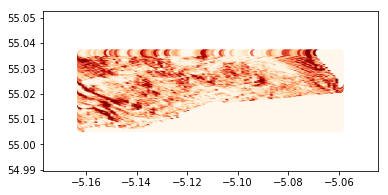

In [30]:
HOGgeo.plot(column='1',cmap='OrRd')
plt.show()

In [31]:
geometry = [Point(xy) for xy in zip(surveyTG.X, surveyTG.Y)]
crs = {'init': 'epsg:4326'}
survey = gpd.GeoDataFrame(surveyTG, crs=crs, geometry=geometry)

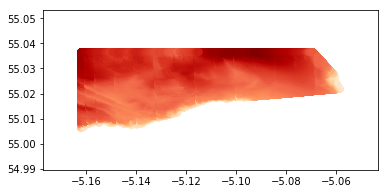

In [32]:
survey.plot(column='Depth',cmap='OrRd')
plt.show()

In [104]:
#find the index of the nearest cell to each sounding
# for sounding in ss:
#     find the closest point in geoHOG
#     add I,J to a list
    

In [33]:
#load in SS
ss = pd.read_csv('..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//SS_HI1509_sc25_C.csv')
ss.head()

,Unnamed: 0,X,Y,Depth
0,0,-5.061154,55.021711,8.7
1,1,-5.070447,55.035497,17.4
2,2,-5.102643,55.035764,23.3
3,3,-5.075537,55.022993,15.6
4,4,-5.088500,55.021832,12.8


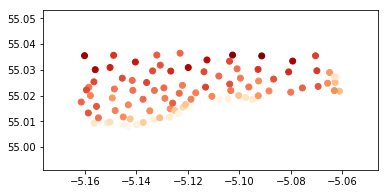

In [34]:
geometry = [Point(xy) for xy in zip(ss.X, ss.Y)]
crs = {'init': 'epsg:4326'}
ss = gpd.GeoDataFrame(ss, crs=crs, geometry=geometry)

ss.plot(column='Depth',cmap='OrRd')
plt.show()

In [1]:
#run up here for comparison - do not run early!
positives.plot(column='1',cmap='OrRd')
plt.show()

NameError: name 'positives' is not defined

In [120]:
# from shapely.ops import nearest_points
# # unary union of the gpd2 geomtries 
# pts3 = HOGgeo.geometry.unary_union
# def near(point, pts=pts3):
#      # find the nearest point and return the corresponding Place value
#      nearest = HOGgeo.geometry == nearest_points(point, pts)[1]
#      return HOGgeo[nearest].I.get_values()[0]
# ss['NearestI'] = ss.apply(lambda row: near(row.geometry), axis=1)

In [121]:
# from shapely.ops import nearest_points
# # unary union of the gpd2 geomtries 
# pts3 = HOGgeo.geometry.unary_union
# def near(point, pts=pts3):
#      # find the nearest point and return the corresponding Place value
#      nearest = HOGgeo.geometry == nearest_points(point, pts)[1]
#      return HOGgeo[nearest].J.get_values()[0]
# ss['NearestJ'] = ss.apply(lambda row: near(row.geometry), axis=1)

#locations = ss.loc[:,['NearestI','NearestJ']]

In [36]:

ss['NearestC'] =(ss['X'] - minx) /stepxhog
ss['NearestR'] =(ss['Y'] - miny) /stepyhog

locations = ss.loc[:,['NearestC','NearestR']]

# for row in ss:
#     NearestI = (ss['X'] - minx) /stepxhog
#     NearestJ = (ss['Y'] - miny) /stepyhog
    
#     row = [NearestI, NearestJ]
#     print(row)

In [37]:
#floor the locations to get the grid cell the positive hit sits in
floored_locations= locations.apply(np.floor)
floored_locations

,NearestC,NearestR
0,97.0,50.0
1,88.0,96.0
2,57.0,97.0
3,83.0,55.0
4,71.0,51.0
5,79.0,49.0
6,95.0,62.0
7,93.0,61.0
8,95.0,51.0
9,89.0,57.0


In [117]:
#create a test dataset which has the nearest 25 cells
positives = pd.DataFrame()

for i in range(0,len(floored_locations)):
    fC = floored_locations.iloc[i][0]
    fR = floored_locations.iloc[i][1]
    
    A = list(HOG_output[(HOG_output['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())

    B1 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOGgeo['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    B2 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOGgeo['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B3 = list(HOG_output[(HOG_output['R'] == fR) & (HOGgeo['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B4 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOGgeo['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B5 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOGgeo['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    B6 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOGgeo['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    B7 = list(HOG_output[(HOG_output['R'] == fR) & (HOGgeo['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    B8 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOGgeo['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    
    C1 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOGgeo['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    C2 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOGgeo['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    C3 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOGgeo['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C4 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOGgeo['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C5 = list(HOG_output[(HOG_output['R'] == fR) & (HOGgeo['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C6 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOGgeo['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C7 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOGgeo['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C8 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOGgeo['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    C9 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOGgeo['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    C10 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOGgeo['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    C11 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOGgeo['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C12 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOGgeo['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C13 = list(HOG_output[(HOG_output['R'] == fR) & (HOGgeo['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C14 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOGgeo['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C15 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOGgeo['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C16 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOGgeo['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    
    
    
    row = A +B1 + B2 + B3 + B4 + B5 + B6 + B7 + B8 + C1 + C2 + C3+ C4 + C5 + C6 + C7 + C8 + C9 + C10 + C11 + C12 + C13 + C14 + C15 + C16

    positives = positives.append([row])

In [115]:
len(row)

100

In [128]:
positives

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.022205,0.241738,0.484627,0.251424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.677303,0.319638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.960220,0.000000,0.000000,0.039741,0.965615,0.000000,0.000000,0.034346,0.566003,0.019699,...,0.000000,0.061700,0.578175,0.000000,0.000000,0.421704,0.872573,0.000000,0.000000,0.127309
0,0.160102,0.297544,0.342275,0.199995,0.056584,0.490653,0.452669,0.000000,0.000000,0.385651,...,0.699111,0.300812,0.000000,0.036351,0.612449,0.351143,0.042060,0.597815,0.167661,0.192398
0,0.234246,0.248455,0.351369,0.165637,0.275605,0.474986,0.065062,0.184022,0.300087,0.339509,...,0.318498,0.150141,0.119572,0.640986,0.239144,0.000000,0.590255,0.278249,0.131168,0.000000
0,0.481169,0.518667,0.000000,0.000000,0.314377,0.622434,0.062875,0.000000,0.182586,0.000000,...,0.400222,0.242571,0.000000,0.390390,0.414071,0.195195,0.112756,0.380701,0.422311,0.084043
0,0.236492,0.319372,0.316162,0.127749,0.382597,0.520133,0.097028,0.000000,0.180396,0.753507,...,0.359153,0.217680,0.104843,0.296542,0.524217,0.074135,0.278361,0.559897,0.109799,0.051760
0,0.878478,0.000000,0.000000,0.121498,0.999976,0.000000,0.000000,0.000000,0.492219,0.362956,...,0.633469,0.169276,0.063535,0.235694,0.263595,0.437128,0.351152,0.288438,0.182942,0.177421
0,0.000000,0.197228,0.633469,0.169276,0.063535,0.235694,0.263595,0.437128,0.351152,0.288438,...,0.000000,0.000000,0.905776,0.000000,0.000000,0.094119,0.711178,0.000000,0.063969,0.224804
0,0.542408,0.231649,0.064212,0.161700,0.207910,0.239461,0.118806,0.433675,0.702301,0.028266,...,0.000000,0.468905,0.021926,0.000000,0.936307,0.041752,0.012649,0.000000,0.477523,0.509824
0,0.231926,0.000000,0.000000,0.767880,0.335234,0.079016,0.302505,0.282966,0.414091,0.000000,...,0.655839,0.092750,0.165495,0.123353,0.632861,0.078015,0.071919,0.610255,0.215758,0.101709


In [126]:
positives.isnull().sum().sum()

0

In [125]:
#convert nans to 0
positives = positives.fillna(0)

In [127]:
positives.to_csv("..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//HOGpositives25_500by500o4p5b1")

# Method 2

In [2]:
ss.head()

NameError: name 'ss' is not defined